#### This Notebook will <li> explore the hypothesis that the distribution of filings is significantly different than a normal distribution

My exploration below investigates if there is something statistically out of the norm about the distribution of the comments filed not being consistent with the distribution of the population by state.   

A sample of 3 million FCC Net Nuetrality comments were taken from the 22 million submitted. The data was cleaned to allocate as many comments as possible to their respective state through the zip code field in the address field. Some fraudulent ones were uncovered for example: 
* an IP address was provided instead of a zip code (in these instances the email address is 'netsparker@example.com' and the city of Chicago is situated in the state of Virgina)
* a valid zipcode appeared in the freeform text field 'internationaladdressentity' field but the city was omitted, something native residents would not do. In addition to a superfluous addition of "United States of America" where it is not required
* instances where a field would be NULL instead of simply blank yeilded a valid zipcode and city, but fake street address - it has already been reported in the press that hundreds of these appeared to posted at the exact identical time 

Once comments where attributed to their states, I imported census data for the 2016 population estimates of each state and DC. With this I created a dataframe with the: 
* % US Population in Each State 
* % of Total Comments by State
* % of Comments to State Population 
* Difference between % US Population and % of Total Comments.  

# Exploring the difference from the national population

### The comments should be distributed by states in proportion to the population. My assumption is that the difference from the state average has a mean of 0 and a standard deviation of 1

 H<sub>0</sub> Null Hypothesis: The proportion of comments from each state is equal to the proportion of the population of that state to the nation.
 
 H<sub>1</sub> Alternative Hypothesis: The distribution of proportions from each state is not equal to the proportion of the population of that state to the nation.

In [1]:
#import 
import pandas as pd
import numpy as np
import scipy.stats as stats
import dc_stat_think as dcst 

In [2]:
#visualization imports
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
df = pd.read_csv('FCC_pop_comments_perc2.csv')

In [4]:
df.head(2)

,POPESTIMATE2016,perc_pop,name,abbreviation,State_Abbreviation,filers,perc_comments,diff_prop_pop_prop_com,diff_perc_pop_comments
0,4863300,1.51,Alabama,AL,AL,29970,1.53,-0.02,-0.02
1,741894,0.23,Alaska,AK,AK,4441,0.23,0.00,0.00


In [5]:
#create dataframe with just state and % of comments to state population
df_diff = df[['State_Abbreviation','diff_perc_pop_comments']]

In [26]:
#explore smaller dataframe
df_diff.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 2 columns):
State_Abbreviation        51 non-null object
diff_perc_pop_comments    51 non-null float64
dtypes: float64(1), object(1)
memory usage: 896.0+ bytes


In [6]:
# rename column
df_diff=df_diff.rename(columns = {'State_Abbreviation':'state','diff_perc_pop_comments':'diff'})

In [7]:
#explore the dataframe of the differences from the national population %
df_diff.head(8)

,state,diff
0,AL,-0.02
1,AK,0.00
2,AZ,0.27
3,AR,0.12
4,CA,1.09
5,CO,-0.23
6,CT,-0.16
7,DE,0.05


In [8]:
df_diff.describe()

,diff
count,5.100000e+01
mean,-3.748363e-17
std,3.594830e-01
min,-8.900000e-01
25%,-7.500000e-02
50%,0.000000e+00
75%,8.000000e-02
max,1.670000e+00


In [9]:
#explore smaller dataframe
df_diff.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 2 columns):
state    51 non-null object
diff     51 non-null float64
dtypes: float64(1), object(1)
memory usage: 896.0+ bytes


In [10]:
#Calculate the difference from the mean and standard deviation
mean = df_diff['diff'].mean()
var = df_diff['diff'].var()
std = df_diff['diff'].std()

In [11]:
print('Sample mean: {}'.format(mean))
print('Sample variance: {}'.format(var))
print('Sample standard deviation : {}'.format(std))

Sample mean: -3.748363275542042e-17
Sample variance: 0.12922799999999993
Sample standard deviation : 0.35948296204410013


In [12]:
# z statistic 
# population mean - sample mean / (standard deviation of sample / root(sample size)

S = ((std)/np.sqrt(len(df_diff['diff'])))
                       
zstat = (0 - mean)/S                     

print('Z-Score : {}'.format(zstat))

Z-Score : 7.446435821116343e-16


In [56]:
prob = stats.norm.cdf(mean, 0, S)
print('P-value : {}'.format(prob))

P-value : 0.4984110466412444


### As the P-value > 0.05 we accept the null hypothesis

Using a 95% confidence interval, with the range -1.96 to +1.96 standard deviations, we can see that the sample mean of -0.000196 falls well within the boundry. Additionally the largest value of +1.67, from the max result from df_diff.describe(), falls into that range. 

In [ ]:
#Several values do have outlier effect. 
#Calculating the Z-score for the whole dataset.

In [13]:
 df_diff['zscore']= df_diff['diff']/std

In [14]:
extremes = df_diff[(df_diff['zscore']>1.96) | (df_diff['zscore']<-1.96)]

In [15]:
# however 4 states have z-scores outside +/- 1.96 Standard Deviations
extremes

,state,diff,zscore
4,CA,1.09,3.032133
37,OR,-0.89,-2.475778
43,TX,1.67,4.645561
46,VA,-0.72,-2.002877


## The proportion of comments from each state relative to the population proportion should be normal

### H<sub>0</sub> Null Hypothesis: the distribution of comment proportions by state of is Normal
### H<sub>1</sub> Alternative Hypothesis: the distribution of proportions from each state is not Normal

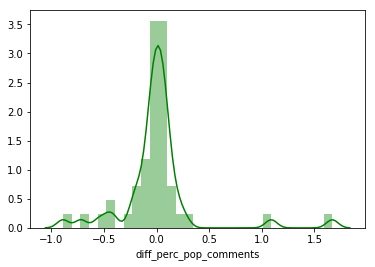

In [16]:
#The proportion of comments attributed to each state should be proportional to the population
#The difference in that proportion should be normally distributed
sns.distplot(df['diff_perc_pop_comments'],color='Green')

In [17]:
s = pd.Series(df['diff_perc_pop_comments'])
s.describe()

count    5.100000e+01
mean    -3.748363e-17
std      3.594830e-01
min     -8.900000e-01
25%     -7.500000e-02
50%      0.000000e+00
75%      8.000000e-02
max      1.670000e+00
Name: diff_perc_pop_comments, dtype: float64

In [18]:
#Test the normal distribution hypothesis from the Population Size = 51 (DC+50 states)
k2, p = stats.normaltest(df['diff_perc_pop_comments'])
alpha = 1e-3
print("alpha = {:g}".format(alpha))
print("p = {:g}".format(p))
if p < alpha:  # null hypothesis: x comes from a normal distribution
     print("The null hypothesis CAN be rejected")
else:
     print("The null hypothesis CANNOT be rejected")


alpha = 0.001
p = 5.90168e-10
The null hypothesis CAN be rejected


The distribution is not normal